# Simple one agent model

A model which, at each time step, iterates over all combinations of a finite set of discrete speed increases/decreases and yaw rotations, which all take $\Delta T = 0.3$ s to execute, simulates the effects over a prediction interval $T_p = \Delta T$ and selects the action which maximises:

$V = -k_g v_g - k_o \sum_i 1 / \tau_i - C_v v^2 - C_t \Delta \psi^2$,

where $v_g$ is the rate of change of the distance to the goal, $\tau_i$ time to collision with obstacle $i$ (infinite if no collision course with $i$), $v$ is longitudinal speed, all three referring to the state after the prediction interval, and $\Delta \psi$ is the change in yaw rotation effectuated for the evaluated action; the rest above are model parameters.

In [23]:
# basic init
import numpy as np
import importlib
import one_agent
importlib.reload(one_agent)
x_goal = np.array([10, 10])

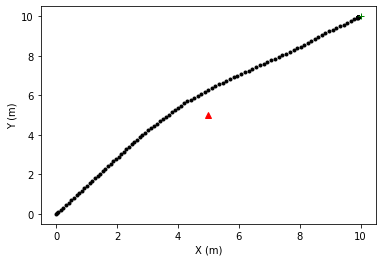

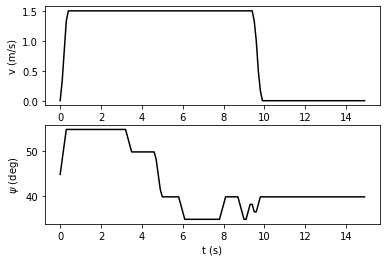

In [24]:
# just one obstacle
x_obstacles = np.array([[5, 5]])
one_agent.run_simulation(x_goal, x_obstacles)

Notice that the agent naturally decelerates to a stop once reaching the goal.

Now adding a second obstacle:

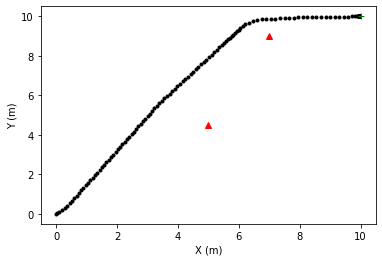

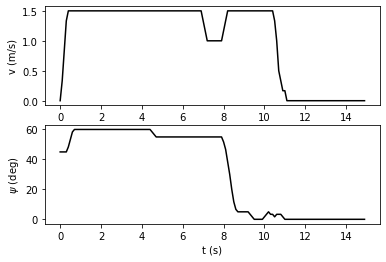

In [25]:
# two obstacles
x_obstacles = np.array([[5, 4.5], [7, 9]])
one_agent.run_simulation(x_goal, x_obstacles)

Some interesting things above, like a preference to go around rather than between the obstacles, and a slight slowing down before turning around the second obstacle, in order not to overshoot.

Increasing the reward for making progress toward the goal gives a speed increase, and in this case makes the agent take a path between the obstacles:

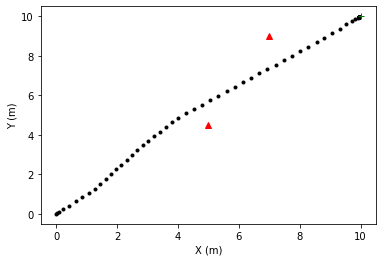

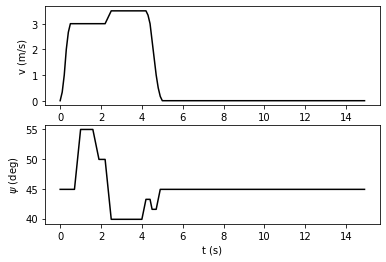

In [26]:
# increasing reward for progress toward goal
params = one_agent.get_default_params()
params["k_g"] = 2
one_agent.run_simulation(x_goal, x_obstacles, params)

# Extended to two-agent model

Basically the model described as the baseline model in the 2020-05-28 version of the "COMMOTIONS modelling: Scope and framework" document, but also including the capability of agents to turn; i.e., it is not a longitudinal-only model.

If the situation is 100% symmetric, i.e., if both agents start at the exact same distance from the conflict point, then depending on the parameterisation the agents will sometimes pass "through" each other (the bits in red below):

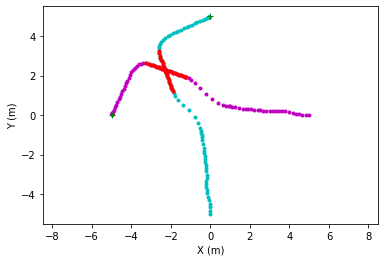

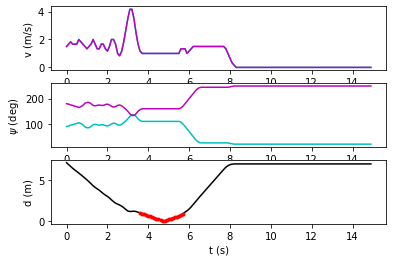

In [27]:
import multiple_agents
importlib.reload(multiple_agents)
pos_agents = np.array([[0, -5], [5, 0]])
pos_goals = np.array([[0, 5], [-5, 0]])
multiple_agents.run_simulation(pos_agents, pos_goals, speed_agents = 1.5)

For asymmetric situations, more interesting things happen, sort of in line with the results of Olivier et al. (2012, 2013):

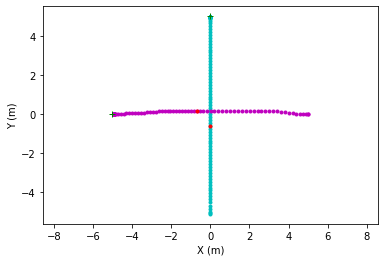

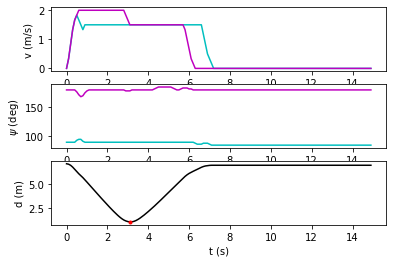

In [28]:
pos_agents = np.array([[0, -5.1], [5, 0]])
multiple_agents.run_simulation(pos_agents, pos_goals)

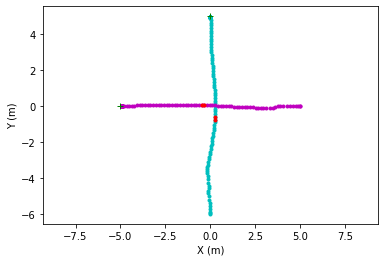

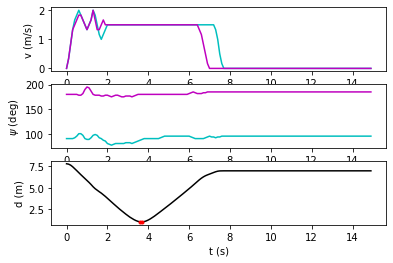

In [29]:
pos_agents = np.array([[0, -6], [5, 0]])
multiple_agents.run_simulation(pos_agents, pos_goals)

Just playing around a little bit with a scenario like the one studied in:
> Turnwald, A., & Wollherr, D. (2019). Human-Like Motion Planning Based on Game Theoretic Decision Making. _International Journal of Social Robotics_, 11(1), 151–170. https://doi.org/10.1007/s12369-018-0487-2

Basically, it seems that the model in its current form doesn't let the agents "agree" on how to solve a conflict in the more advanced kind of way observed in that paper (which I guess was sort of expected):

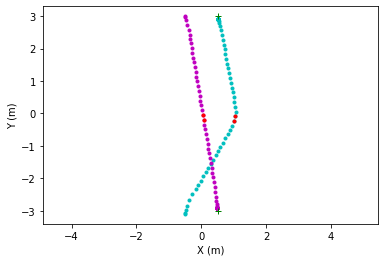

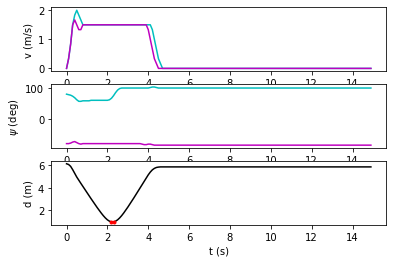

In [30]:
pos_agents = np.array([[-.5, -3.1], [-.5, 3]])
pos_goals = np.array([[.5, 3], [.5, -3]])
multiple_agents.run_simulation(pos_agents, pos_goals)

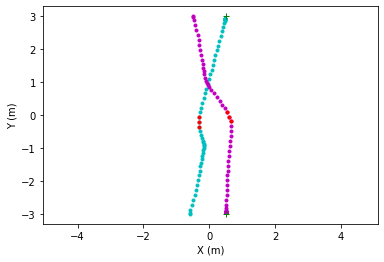

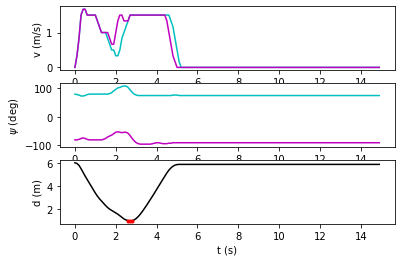

In [31]:
pos_agents = np.array([[-.6, -3], [-.5, 3]])
pos_goals = np.array([[.5, 3], [.5, -3]])
multiple_agents.run_simulation(pos_agents, pos_goals)

# Multiple agents - object oriented implementation
An attempt at recreating the exact same results as just above, in an implementation framework that might be a bit more extensible.

GM note 2020-06-02: This more object oriented approach is what I have then used to create the more complete model in the root of this repository, implementing more of the assumptions described in the model scoping document. I am still a bit on the fence about whether or not object orientation is the way to go. It's nice in general for having a hierarchy of different models with different capabilities, but maybe it's too early still in the modelling for it to be worth the effort - it's very easy to spend a lot of time thinking about the best design of the classes to cover future expansions of the model, whereas we don't really know yet what future expansions should look like. So maybe a non-OO approach is more time-efficient in these early stages?

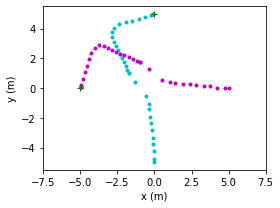

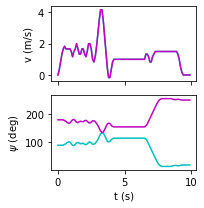

In [32]:
import importlib
import commotions
importlib.reload(commotions)
import numpy as np
import matplotlib.pyplot as plt
import multiple_agents_oo
test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
# agent start/goal positions (yaw_angle = None initialises agent as oriented towards its goal)
initial_state_A = commotions.KinematicState(pos = np.array([0, -5]), yaw_angle = None)
goal_A = np.array((0, 5))
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None)
goal_B = np.array((-5, 0))
# 
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, plot_color = 'c')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, plot_color = 'm')
#
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()                    

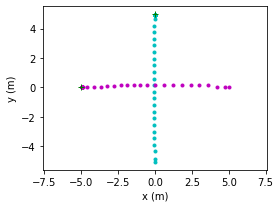

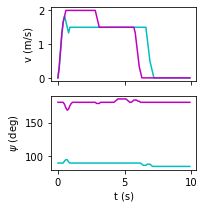

In [33]:
test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
initial_state_A = commotions.KinematicState(pos = np.array([0, -5.1]), yaw_angle = None)
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None)
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, plot_color = 'c')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, plot_color = 'm')
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()  

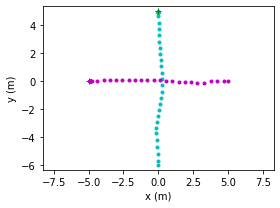

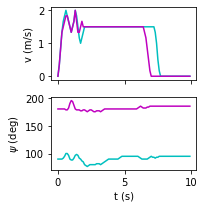

In [34]:
test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
initial_state_A = commotions.KinematicState(pos = np.array([0, -6]), yaw_angle = None)
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None)
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, plot_color = 'c')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, plot_color = 'm')
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()  

So - getting the same results back as before.

# Longitudinal only version

As discussed in the "COMMOTIONS modelling: Scope and framework" document, we are focusing first on longitudinal-only movement. Using the same code as above here, just removing the ability of agents to turn, to generate the figures for the 2020-05-08 version of the scoping doc. 

First with agent A 5.1 m from conflict point and agent B 5 m from it:

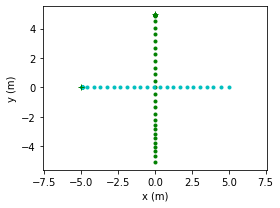

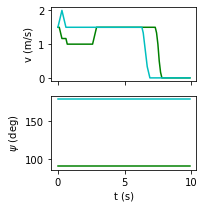

In [35]:
import importlib
import commotions
importlib.reload(commotions)
import numpy as np
import matplotlib.pyplot as plt
import multiple_agents_oo
importlib.reload(multiple_agents_oo)

#%matplotlib inline
#%matplotlib qt

test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
# agent start/goal positions (yaw_angle = None initialises agent as oriented towards its goal)
initial_state_A = commotions.KinematicState(pos = np.array([0, -5.1]), yaw_angle = None, long_speed = 1.5)
goal_A = np.array((0, 5))
initial_state_B = commotions.KinematicState(pos = np.array([5, 0]), yaw_angle = None, long_speed = 1.5)
goal_B = np.array((-5, 0))
#
params = multiple_agents_oo.SimpleAgent.get_default_parameters()
params.deltapsis = np.array([0])
# 
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, params, plot_color = 'g')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, params, plot_color = 'c')
#
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show()   

And now with both agents starting 5 m from the conflict point:

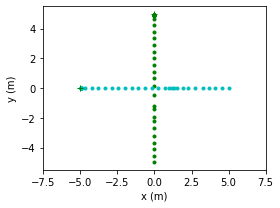

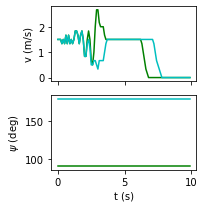

In [36]:
test_simulation = commotions.Simulation(start_time = 0, end_time = 10, time_step = 0.1)
initial_state_A = commotions.KinematicState(pos = np.array([0, -5]), yaw_angle = None, long_speed = 1.5)
goal_A = np.array((0, 5))
agent_A = multiple_agents_oo.SimpleAgent('A', test_simulation, initial_state_A, goal_A, params, plot_color = 'g')
agent_B = multiple_agents_oo.SimpleAgent('B', test_simulation, initial_state_B, goal_B, params, plot_color = 'c')
test_simulation.run()
test_simulation.plot_trajectories()
test_simulation.plot_time_series()
plt.show() 
